## 过拟合和欠拟合

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
x = np.random.uniform(-3.0,3.0,size=100)
X = x.reshape(-1,1)
y = 0.5 * x **2 + x + 2 + np.random.normal(0,1,size=100)

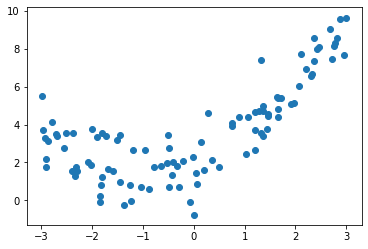

In [3]:
plt.scatter(x,y)
plt.show()

### 使用线性回归

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
y_predict = lin_reg.predict(X)

lin_reg.score(X,y)

0.4953707811865009

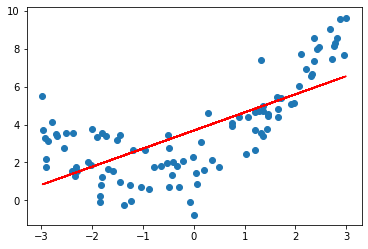

In [5]:
plt.scatter(x,y)
plt.plot(x,y_predict,color='r')
plt.show()

In [6]:
from sklearn.metrics import mean_squared_error

In [7]:
y_predict = lin_reg.predict(X)

mean_squared_error(y_predict,y)

3.0750025765636577

### 使用多项式回归

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

def PolynomialRegression(degree):
    return Pipeline([
        ("poly",PolynomialFeatures(degree = degree)),
        ("std_scaler",StandardScaler()),
        ("lin_reg",LinearRegression())
    ])

In [9]:
poly2_reg = PolynomialRegression(degree = 2)
poly2_reg.fit(X,y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [10]:
y_predict2 = poly2_reg.predict(X)
mean_squared_error(y,y_predict2)

1.0987392142417856

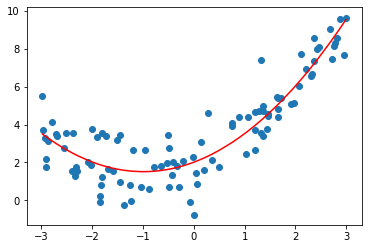

In [11]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict2[np.argsort(x)],color='r')
plt.show()

In [12]:
poly10_reg = PolynomialRegression(degree = 10)
poly10_reg.fit(X,y)

y_predict10 = poly10_reg.predict(X)
mean_squared_error(y,y_predict10)

1.050846676376417

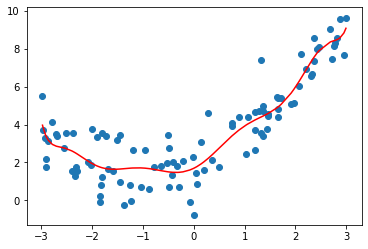

In [13]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict10[np.argsort(x)],color='r')
plt.show()

In [14]:
poly100_reg = PolynomialRegression(degree = 100)
poly100_reg.fit(X,y)

y_predict100 = poly100_reg.predict(X)
mean_squared_error(y,y_predict100)

0.6880004678712686

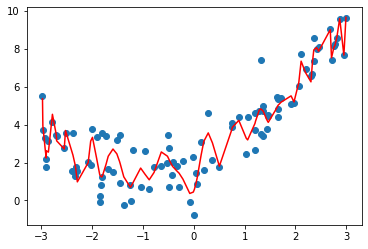

In [15]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict100[np.argsort(x)],color='r')
plt.show()

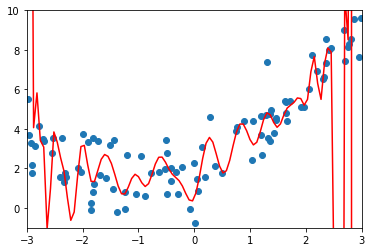

In [16]:
X_plot = np.linspace(-3,3,100).reshape(100,1)
y_plot = poly100_reg.predict(X_plot)

plt.scatter(x,y)
plt.plot(X_plot[:,0],y_plot,color='r')
plt.axis([-3,3,-1,10])
plt.show()

### train test split  的意义

In [17]:
 from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=666)

In [18]:
lin_reg = LinearRegression()

lin_reg.fit(X_train,y_train)
y_predict = lin_reg.predict(X_test)
mean_squared_error(y_test,y_predict)

2.2199965269396573

In [19]:
poly2_reg = PolynomialRegression(degree = 2)
poly2_reg.fit(X_train,y_train)

y_predict2 = poly2_reg.predict(X_test)
mean_squared_error(y_test,y_predict2)

0.80356410562979

In [20]:
poly10_reg = PolynomialRegression(degree = 10)
poly10_reg.fit(X_train,y_train)

y_predict10 = poly10_reg.predict(X_test)
mean_squared_error(y_test,y_predict10)

0.9212930722150768

In [21]:
poly100_reg = PolynomialRegression(degree = 100)
poly100_reg.fit(X_train,y_train)

y_predict100 = poly100_reg.predict(X_test)
mean_squared_error(y_test,y_predict100)

14075796434.50641